# Machine learning Ensup

---

## Imports

In [3]:
import numpy as np
import pandas as pd
import os
import json
from ast import literal_eval
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns  # for coloring 

---

## Dataset loading

In [4]:
df_2015 = pd.read_csv("../data/2015-building-energy-benchmarking.csv")
df_2016 = pd.read_csv("../data/2016-building-energy-benchmarking.csv")
pd.options.display.max_columns = 50

---

## Data cleaning

In [5]:
print(f"Df 2015 SHAPE : {df_2015.shape} | Df 2016 SHAPE : {df_2016.shape}")

Df 2015 SHAPE : (3340, 47) | Df 2016 SHAPE : (3376, 46)


In [6]:
print(f"Df 2015 DUPLICATE : {df_2015[df_2015.duplicated()].shape} | Df 2016 DUPLICATE : {df_2016[df_2016.duplicated()].shape}")

Df 2015 DUPLICATE : (0, 47) | Df 2016 DUPLICATE : (0, 46)


In [7]:
df_2015.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [8]:
df_2016.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [9]:
# Get all different value without "Seattle"
df_2016[df_2016['City'] != 'Seattle']

# Get all unique value of a column
df_ = list(df_2016['City'].unique())

In [10]:
def compare_cols(df1, df2):
    """
        Compare two dataset and get the list of columns differences
        
    """
    df1_idx = list(df1.columns)
    df2_idx = list(df2.columns)
    
    diff_list_df1 = []
    diff_list_df2 = []
    
    for item in df1_idx:
        if item not in df2_idx:
            diff_list_df1.append(item)
            
    for item in df2_idx:
        if item not in df1_idx:
            diff_list_df2.append(item)
    
    return diff_list_df1, diff_list_df2

In [11]:
def search_componant(df, suffix=None):
    """
        Return a list of index with a suffix
        :return list
    """
    componant = []
    for col in df.columns:
        if suffix in col: 
            componant.append(col)
    return componant

In [12]:
compare_cols(df_2015, df_2016)

(['Location',
  'OtherFuelUse(kBtu)',
  'GHGEmissions(MetricTonsCO2e)',
  'GHGEmissionsIntensity(kgCO2e/ft2)',
  'Comment',
  '2010 Census Tracts',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'City Council Districts',
  'SPD Beats',
  'Zip Codes'],
 ['Address',
  'City',
  'State',
  'ZipCode',
  'Latitude',
  'Longitude',
  'Comments',
  'TotalGHGEmissions',
  'GHGEmissionsIntensity'])

In [13]:
df_2015_ = df_2015['Location'].map(literal_eval).apply(pd.Series)

In [14]:
df_2015_2 = df_2015_['human_address'].map(literal_eval).apply(pd.Series)

In [15]:
df_2015_final = pd.concat([df_2015_.drop(['human_address'], axis=1), df_2015_2], axis=1)

In [16]:
df_2015 = pd.concat([df_2015.drop(['Location'], axis=1), df_2015_final], axis=1)

In [17]:
compare_cols(df_2015, df_2016)

(['OtherFuelUse(kBtu)',
  'GHGEmissions(MetricTonsCO2e)',
  'GHGEmissionsIntensity(kgCO2e/ft2)',
  'Comment',
  '2010 Census Tracts',
  'Seattle Police Department Micro Community Policing Plan Areas',
  'City Council Districts',
  'SPD Beats',
  'Zip Codes',
  'latitude',
  'longitude',
  'address',
  'city',
  'state',
  'zip'],
 ['Address',
  'City',
  'State',
  'ZipCode',
  'Latitude',
  'Longitude',
  'Comments',
  'TotalGHGEmissions',
  'GHGEmissionsIntensity'])

In [18]:
# Rename columns issue
df_2015.rename(columns={"latitude":"Latitude", 
                        "longitude": "Longitude", 
                        "address": "Address", 
                        "zip": "ZipCode", 
                        "city": "City", 
                        "state": "State", 
                        "GHGEmissionsIntensity(kgCO2e/ft2)": "GHGEmissionsIntensity", 
                        "GHGEmissions(MetricTonsCO2e)" : "TotalGHGEmissions"}, 
               inplace=True)

In [19]:
df_2015.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,...,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,...,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,...,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101


In [20]:
list1, list2 = compare_cols(df_2015, df_2016)

In [21]:
# Drop unused features
df_2015 = df_2015.drop(list1, axis=1)
df_2016 = df_2016.drop(list2, axis=1)

In [22]:
compare_cols(df_2015, df_2016)

([], [])

In [23]:
print(f"Df 2015 SHAPE : {df_2015.shape} | Df 2016 SHAPE : {df_2016.shape}")

Df 2015 SHAPE : (3340, 45) | Df 2016 SHAPE : (3376, 45)


In [24]:
df_final = pd.concat([df_2015, df_2016]).reset_index(drop=True)

In [25]:
df_final.shape

(6716, 45)

In [26]:
isNull = df_final.isnull().sum().sort_values(ascending=False)
isNull

Outlier                            6600
YearsENERGYSTARCertified           6487
ThirdLargestPropertyUseTypeGFA     5560
ThirdLargestPropertyUseType        5560
SecondLargestPropertyUseType       3478
SecondLargestPropertyUseTypeGFA    3478
ENERGYSTARScore                    1623
LargestPropertyUseType              156
LargestPropertyUseTypeGFA           156
ListOfAllPropertyUseTypes           136
Electricity(kBtu)                    19
Electricity(kWh)                     19
SteamUse(kBtu)                       19
SourceEUI(kBtu/sf)                   19
NaturalGas(therms)                   19
NaturalGas(kBtu)                     19
TotalGHGEmissions                    19
GHGEmissionsIntensity                19
SourceEUIWN(kBtu/sf)                 19
SiteEUI(kBtu/sf)                     17
SiteEnergyUseWN(kBtu)                16
SiteEUIWN(kBtu/sf)                   16
ZipCode                              16
SiteEnergyUse(kBtu)                  15
NumberofFloors                        8


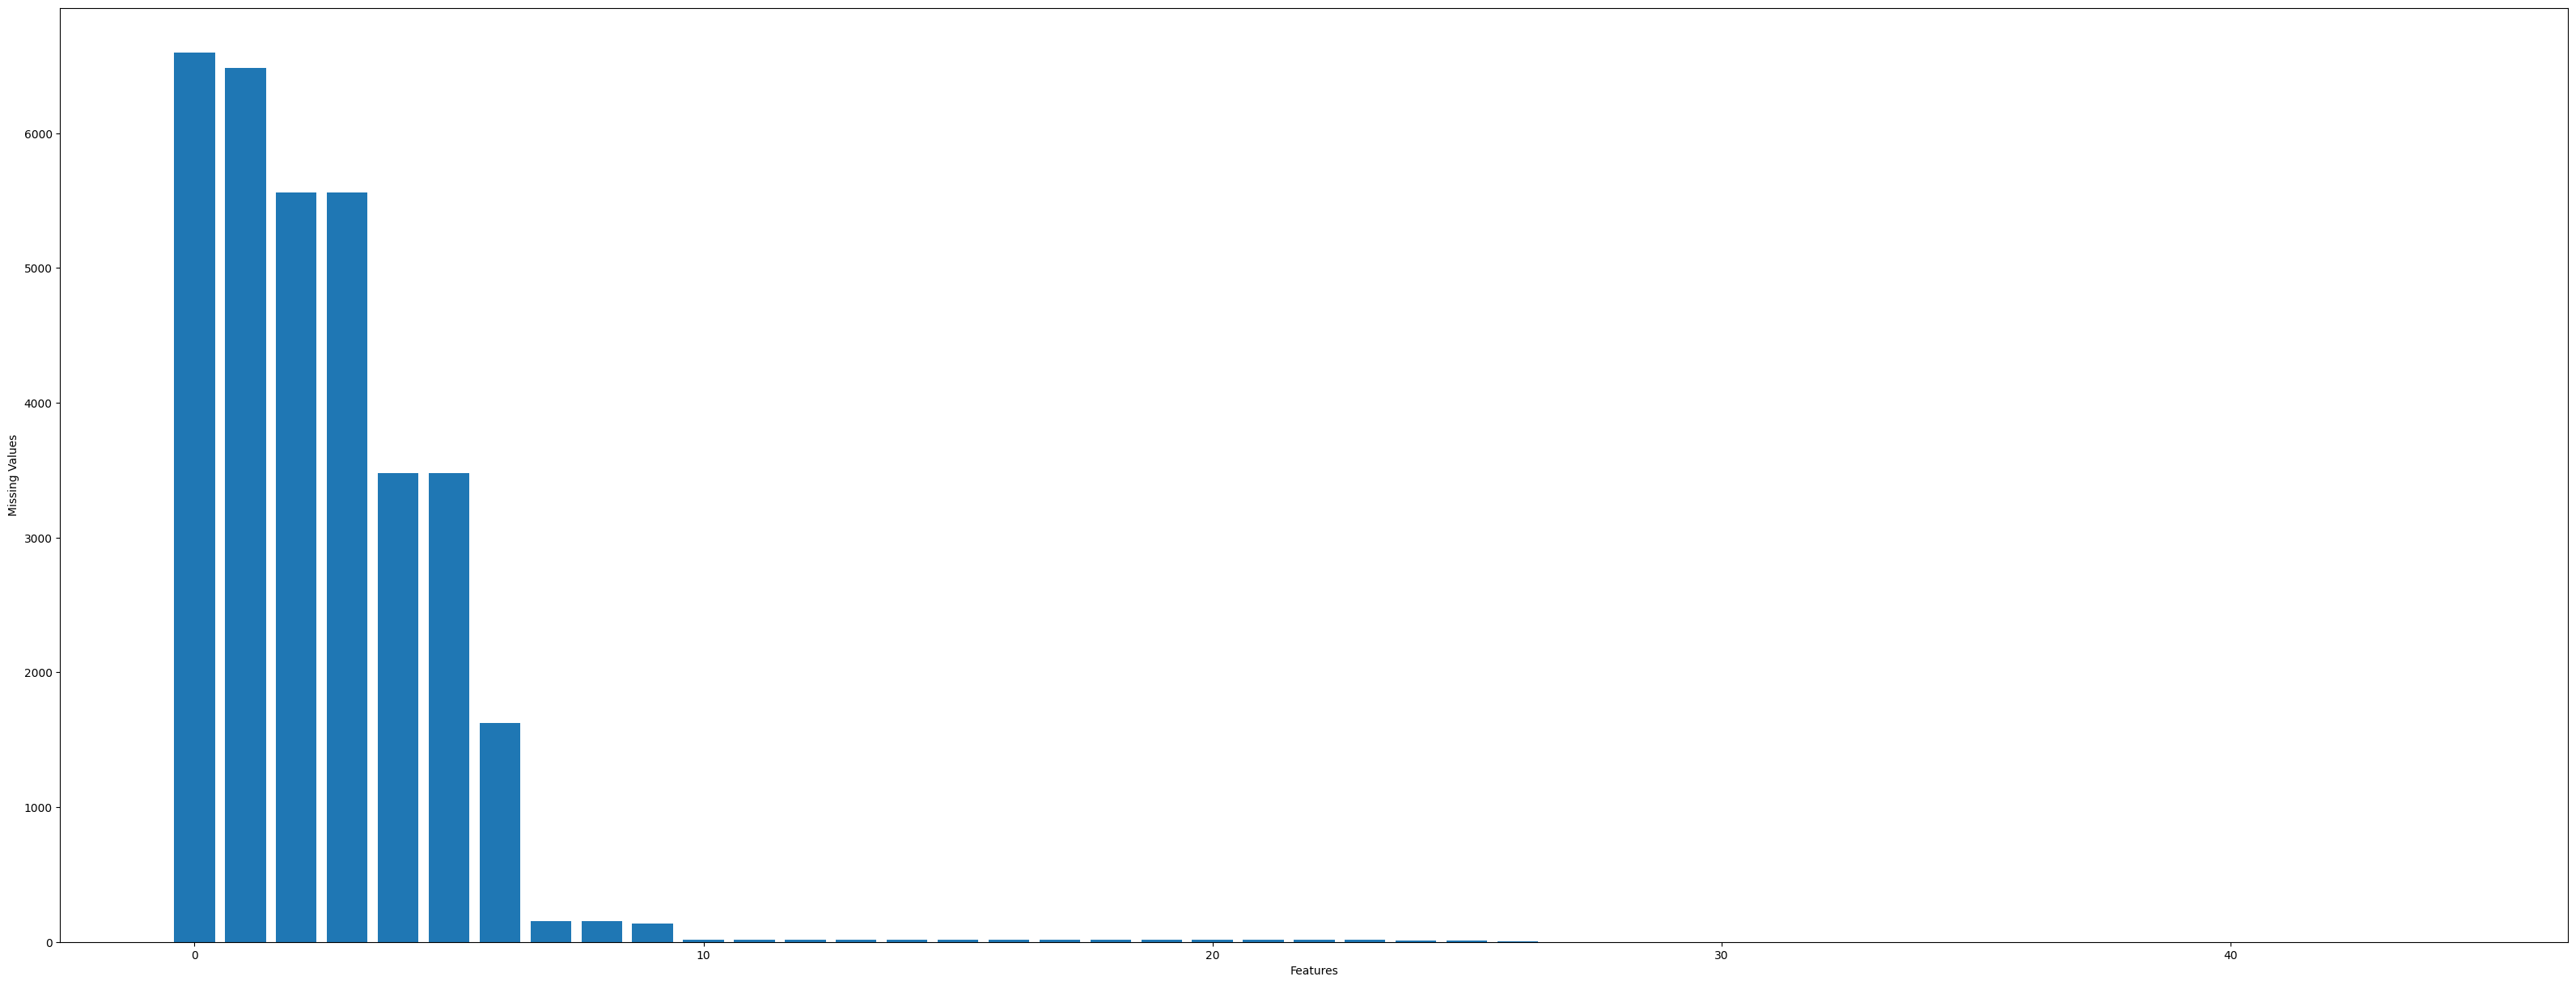

In [27]:
fig = plt.figure(1, figsize=(40, 15))

plt.bar(range(len(isNull.index)), isNull)
plt.xlabel('Features')
plt.ylabel('Missing Values')
plt.show()

In [28]:
df_final = df_final.dropna(subset=['TotalGHGEmissions','GHGEmissionsIntensity', 'SiteEUI(kBtu/sf)'])

In [29]:
# Suppressions des variables qui ne nous intéressent pas
df_final.drop(['State',
               'ZipCode',
               'City', 
               'Outlier', 
               'PropertyName', 
               'TaxParcelIdentificationNumber', 
               'ComplianceStatus', 
               'DefaultData',
               'Address', 
               'YearsENERGYSTARCertified'], axis=1, inplace=True)

# Suppression des variables avec suffixe WN
df_final.drop(search_componant(df_final,'WN'), axis=1, inplace=True)

# Suppression des variables redondantes
df_final.drop(['NaturalGas(therms)','Electricity(kWh)'], axis=1, inplace=True)

df_final['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
df_final['Neighborhood']=df_final['Neighborhood'].map(lambda x: x.upper())


In [29]:
index_to_drop=df_final[df_final['PropertyGFABuilding(s)']<0].index
df_final.drop(index_to_drop, inplace=True)

In [30]:
index_to_drop=df_final[df_final['PropertyGFAParking']<0].index
df_final.drop(index_to_drop, inplace=True)

In [31]:
df_final['NumberofBuildings'].fillna(0, inplace=True)
df_final['NumberofBuildings'].replace(0, 1, inplace=True)
df_final['NumberofFloors'].fillna(0, inplace=True)
df_final['NumberofFloors'].replace(0, 1, inplace=True)

---
## Feature categorization

In [32]:
columns_to_categorize = ['BuildingType', 'CouncilDistrictCode', 'Neighborhood']

In [33]:
df_final[columns_to_categorize] = df_final[columns_to_categorize].astype('category')

---

## Plot features correlation

/tmp/ipykernel_22233/1587571283.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df_final.corr()


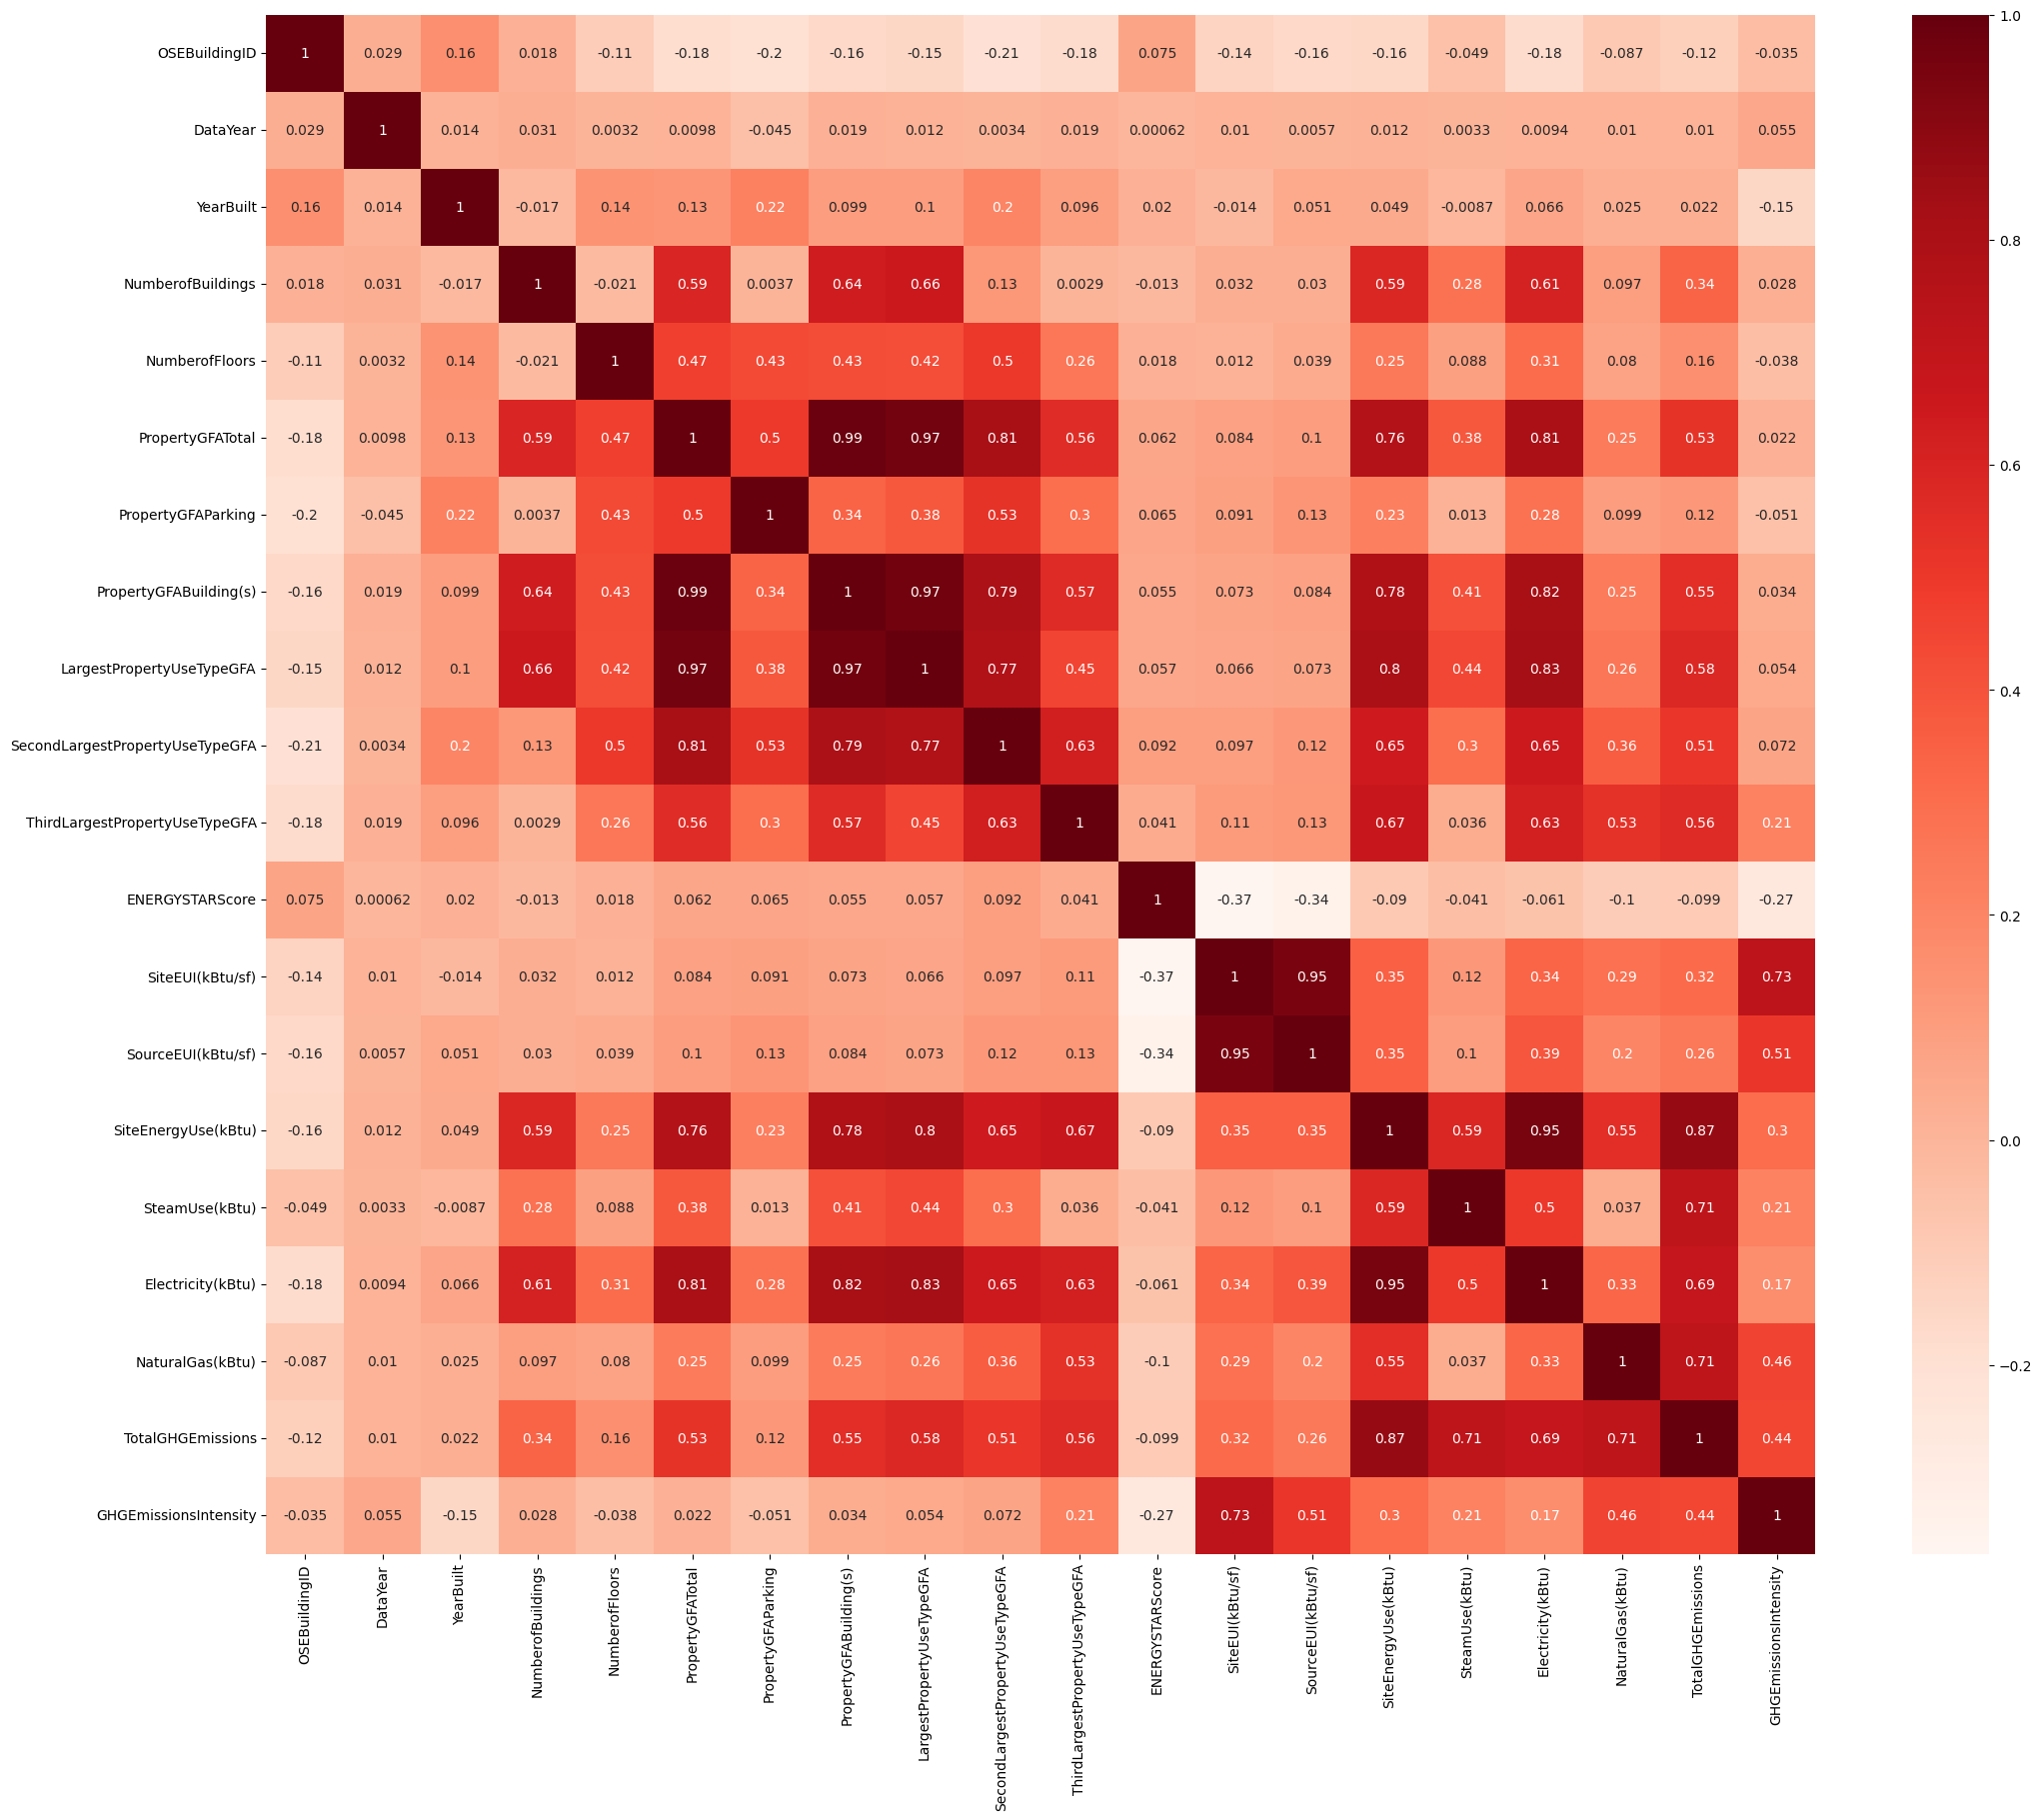

In [34]:
# Check Correlation
plt.figure(figsize=(25,20))
cor = df_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [35]:
# Save final dataset to CSV
df_final.to_csv('../data/building-energy-benchmarking-final.csv', index=False)

---

## Data Structuration


In [30]:
from sklearn.impute import SimpleImputer

In [31]:
df = pd.read_csv('../data/building-energy-benchmarking-final.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3305 entries, 0 to 3304
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OSEBuildingID          3305 non-null   float64
 1   DataYear               3305 non-null   float64
 2   YearBuilt              3305 non-null   float64
 3   NumberofBuildings      3305 non-null   float64
 4   NumberofFloors         3305 non-null   float64
 5   PropertyGFATotal       3305 non-null   float64
 6   PropertyGFAParking     3305 non-null   float64
 7   SiteEUI(kBtu/sf)       3305 non-null   float64
 8   SiteEnergyUse(kBtu)    3305 non-null   float64
 9   SteamUse(kBtu)         3305 non-null   float64
 10  NaturalGas(kBtu)       3305 non-null   float64
 11  GHGEmissionsIntensity  3305 non-null   float64
 12  TotalGHGEmissions      3305 non-null   float64
 13  BuildingType           3305 non-null   object 
 14  PrimaryPropertyType    3305 non-null   object 
 15  Coun

In [66]:
df = df[~df['BuildingType'].str.contains("Multifamily")]

In [67]:
seuil = df['LargestPropertyUseType'].value_counts(normalize=True)

list_seuil = seuil[seuil >= 0.005871].index

In [68]:
for ind, item in df['LargestPropertyUseType'].iteritems():
    if item not in list_seuil:
        df['LargestPropertyUseType'] = df['LargestPropertyUseType'].replace({item:"autres"})
    else:
        pass

/tmp/ipykernel_22233/2584251384.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ind, item in df['LargestPropertyUseType'].iteritems():


In [71]:
cor_matrix = df.corr().abs()

/tmp/ipykernel_22233/1835869692.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr().abs()


In [72]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

/tmp/ipykernel_22233/3673341754.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [74]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

In [76]:
to_drop

['PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SourceEUI(kBtu/sf)',
 'Electricity(kBtu)']

In [77]:
df1 = df.drop(to_drop, axis=1)

In [78]:
df1

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
0,1,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,Hotel,Hotel,NaN,NaN,NaN,NaN,65.0,78.900000,6.981428e+06,2023032.0,1.272388e+06,249.43,2.64,47.612190,-122.337997
1,2,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,"Hotel, Parking, Restaurant",Hotel,Parking,15064.0,Restaurant,4622.0,51.0,94.400000,8.354235e+06,0.0,4.448985e+06,263.51,2.38,47.613106,-122.333358
2,3,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,0,"Hotel, Parking, Swimming Pool",Hotel,Parking,100000.0,Swimming Pool,0.0,18.0,96.600000,7.313066e+07,19660404.0,3.709900e+06,2061.48,1.92,47.613349,-122.337699
3,5,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,61320,0,Hotel,Hotel,NaN,NaN,NaN,NaN,1.0,460.400000,2.822932e+07,23458518.0,2.001894e+06,1936.34,31.38,47.614216,-122.336609
4,8,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,119890,12460,"Hotel, Parking, Swimming Pool",Hotel,Parking,68009.0,Swimming Pool,0.0,67.0,120.100000,1.482910e+07,0.0,8.763105e+06,507.70,4.02,47.613754,-122.340924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6686,50222,2016,Nonresidential COS,Office,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,Office,Office,NaN,NaN,NaN,NaN,46.0,69.099998,8.497457e+05,0.0,3.254750e+05,20.94,1.70,47.567220,-122.311540
6687,50223,2016,Nonresidential COS,Other,2,DOWNTOWN,2004,1.0,1.0,16000,0,Other - Recreation,Other - Recreation,NaN,NaN,NaN,NaN,NaN,59.400002,9.502762e+05,0.0,5.537300e+05,32.17,2.01,47.596250,-122.322830
6688,50224,2016,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,438.200012,5.765898e+06,0.0,3.973739e+06,223.54,16.99,47.636440,-122.357840
6689,50225,2016,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,51.000000,7.194712e+05,0.0,3.706010e+05,22.11,1.57,47.528320,-122.324310


---

### impute  features

In [81]:
df_qualy = list(df1.select_dtypes(include=['object']).columns)
df_quanty = list(df1.select_dtypes(include=['float64','int64']).columns)

In [84]:
print(f"{df1.shape} | somme : {len(df_qualy) + len(df_quanty)}")

(3305, 26) | somme : 26


In [41]:
print(f"Quantitatif dataset shape : {df_quanty.shape} | Qualitatif dataset shape : {df_qualy.shape}")

Quantitatif dataset shape : (3305, 23) | Qualitatif dataset shape : (3305, 7)


In [42]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_result = imputer.fit_transform(df_quanty)

In [43]:
df_quanty_imputed = pd.DataFrame(imp_result, columns =list(df_quanty.columns))

In [45]:
df_quanty_imputed.head(4)

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
0,1.0,2015.0,7.0,1927.0,1.0,12.0,88434.0,0.0,88434.0,88434.0,35783.377208,14059.484501,65.0,78.9,173.5,6981428.0,2023032.0,3686160.0,1272388.0,249.43,2.64,47.612190,-122.337997
1,2.0,2015.0,7.0,1996.0,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.000000,4622.000000,51.0,94.4,191.3,8354235.0,0.0,3905411.0,4448985.0,263.51,2.38,47.613106,-122.333358
2,3.0,2015.0,7.0,1969.0,1.0,41.0,961990.0,0.0,961990.0,757243.0,100000.000000,0.000000,18.0,96.6,242.7,73130656.0,19660404.0,49762435.0,3709900.0,2061.48,1.92,47.613349,-122.337699
3,5.0,2015.0,7.0,1926.0,1.0,10.0,61320.0,0.0,61320.0,61320.0,35783.377208,14059.484501,1.0,460.4,636.3,28229320.0,23458518.0,2769023.0,2001894.0,1936.34,31.38,47.614216,-122.336609


---

### Qualitative features

In [46]:
df_qualy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3305 entries, 0 to 6690
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   BuildingType                  3305 non-null   category
 1   PrimaryPropertyType           3305 non-null   category
 2   Neighborhood                  3305 non-null   category
 3   ListOfAllPropertyUseTypes     3244 non-null   category
 4   LargestPropertyUseType        3236 non-null   category
 5   SecondLargestPropertyUseType  1663 non-null   category
 6   ThirdLargestPropertyUseType   684 non-null    category
dtypes: category(7)
memory usage: 70.2 KB


In [47]:
df_qualy["BuildingType"].value_counts()

NonResidential        2914
SPS-District K-12      191
Nonresidential COS     153
Campus                  46
Nonresidential WA        1
Name: BuildingType, dtype: int64

In [49]:
df_qualy['LargestPropertyUseType'].value_counts()

Office                                                  973
Non-Refrigerated Warehouse                              393
K-12 School                                             269
Retail Store                                            198
Other                                                   198
Hotel                                                   144
Worship Facility                                        141
Distribution Center                                     106
Medical Office                                           84
Supermarket/Grocery Store                                78
Parking                                                  55
Self-Storage Facility                                    54
Other - Recreation                                       51
College/University                                       44
Other - Entertainment/Public Assembly                    41
Senior Care Community                                    39
Residence Hall/Dormitory                

In [48]:
df_qualy['LargestPropertyUseType'].value_counts(normalize=True)

Office                                                  0.300680
Non-Refrigerated Warehouse                              0.121446
K-12 School                                             0.083127
Retail Store                                            0.061187
Other                                                   0.061187
Hotel                                                   0.044499
Worship Facility                                        0.043572
Distribution Center                                     0.032756
Medical Office                                          0.025958
Supermarket/Grocery Store                               0.024104
Parking                                                 0.016996
Self-Storage Facility                                   0.016687
Other - Recreation                                      0.015760
College/University                                      0.013597
Other - Entertainment/Public Assembly                   0.012670
Senior Care Community    

In [384]:
df.nlargest(40, ["TotalGHGEmissions"])['LargestPropertyUseType'].value_counts()

Hospital (General Medical & Surgical)    13
Hotel                                     7
College/University                        5
Other                                     5
Medical Office                            3
Laboratory                                2
Data Center                               2
Office                                    1
Other - Entertainment/Public Assembly     1
Name: LargestPropertyUseType, dtype: int64

In [52]:
# 0.005871
seuil = df_qualy['LargestPropertyUseType'].value_counts(normalize=True)

list_seuil = seuil[seuil >= 0.005871].index

In [55]:
for ind, item in df_qualy['LargestPropertyUseType'].iteritems():
    if item not in list_seuil:
        df_qualy['LargestPropertyUseType'] = df_qualy['LargestPropertyUseType'].replace({item:"autres"})
    else:
        pass

/tmp/ipykernel_22233/4158247840.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ind, item in df_qualy['LargestPropertyUseType'].iteritems():


In [59]:
df_qualy['LargestPropertyUseType'].value_counts()

Office                                   973
Non-Refrigerated Warehouse               393
K-12 School                              269
autres                                   199
Retail Store                             198
Other                                    198
Hotel                                    144
Worship Facility                         141
Distribution Center                      106
Medical Office                            84
Supermarket/Grocery Store                 78
Parking                                   55
Self-Storage Facility                     54
Other - Recreation                        51
College/University                        44
Other - Entertainment/Public Assembly     41
Senior Care Community                     39
Residence Hall/Dormitory                  38
Refrigerated Warehouse                    24
Restaurant                                23
Multifamily Housing                       23
Laboratory                                22
Social/Mee

In [62]:
print(f"{df_qualy.shape} {df_quanty.shape}")

(3305, 7) (3305, 23)


In [ ]:
#1 Faire une headmap pour voir la matrice de correlation qui va permettre de choisir vos variables 
#2 Ne pas selectionner les variables trop corrélees à nos target et ne pas prendre les variables trop correlees deux a deux 
#3 Voir ce qu'est une pipeline et comment l'utiliser pour les modèles 
#4 TrainTest split à 0.7 / 0.3 
#5 1er modèle :
#Dummy Regressor qui est une Baseline 
# RegressionLineaire 
# Lasso 
# Ridge 
# Random Forest 
# Gradient Boosting 

# Evaluation des metrics MSE ou RMSE et le temps 

In [ ]:
# pro.cherkaoui.younes@gmail

---

## (Optional) Data Prediction

In [35]:
X = df.drop(["TotalGHGEmissions"], axis=1)
y = df["TotalGHGEmissions"]

print(f"X shape : {X.shape} | y shape : {y.shape}")

X shape : (6687, 29) | y shape : (6687,)


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6687 entries, 0 to 6686
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6687 non-null   int64  
 1   DataYear                         6687 non-null   int64  
 2   BuildingType                     6687 non-null   object 
 3   PrimaryPropertyType              6687 non-null   object 
 4   CouncilDistrictCode              6687 non-null   int64  
 5   Neighborhood                     6687 non-null   object 
 6   YearBuilt                        6687 non-null   int64  
 7   NumberofBuildings                6687 non-null   float64
 8   NumberofFloors                   6687 non-null   float64
 9   PropertyGFATotal                 6687 non-null   int64  
 10  PropertyGFAParking               6687 non-null   int64  
 11  PropertyGFABuilding(s)           6687 non-null   int64  
 12  ListOfAllPropertyUse

In [37]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [38]:
sel.fit_transform(X)

ValueError: could not convert string to float: 'NonResidential'